# Analysis for the Museum of Modern Art

The Museum of Modern Art (MoMA) acquired its first artworks in 1929, the year it was established. Today, the Museum’s evolving collection contains almost 200,000 works from around the world spanning the last 150 years. The collection includes an ever-expanding range of visual expression, including painting, sculpture, printmaking, drawing, photography, architecture, design, film, and media and performance art. 

The data, uploaded 2/15/2017, includes the title, artist, date, and medium of every artwork in the MoMA collection.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
# to display all columns of a dataframe
pd.set_option('display.max_columns', 42) # use this to see all the columns in a df display
np.set_printoptions(threshold=sys.maxsize) # use this to see full arrays without truncation

In [ ]:
artists = pd.read_csv('artists.csv', dtype='unicode')
artworks = pd.read_csv('artworks.csv', dtype='unicode') 

In [ ]:
artists.head()

,Artist ID,Name,Nationality,Gender,Birth Year,Death Year
0,1,Robert Arneson,American,Male,1930,1992
1,2,Doroteo Arnaiz,Spanish,Male,1936,NaN
2,3,Bill Arnold,American,Male,1941,NaN
3,4,Charles Arnoldi,American,Male,1946,NaN
4,5,Per Arnoldi,Danish,Male,1941,NaN


In [ ]:
artworks.head()

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,Department,Classification,Object Number,Diameter (cm),Circumference (cm),Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s)
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,Architecture & Design,Architecture,885.1996,NaN,NaN,48.6,NaN,168.9,NaN,NaN,NaN
1,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,Architecture & Design,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN
2,4,"Villa near Vienna Project, Outside Vienna, Aus...",7605,Emil Hoppe,1903,"Graphite, pen, color pencil, ink, and gouache ...","13 1/2 x 12 1/2"" (34.3 x 31.8 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,Architecture & Design,Architecture,1.1997,NaN,NaN,34.3,NaN,31.8,NaN,NaN,NaN
3,5,"The Manhattan Transcripts Project, New York, N...",7056,Bernard Tschumi,1980,Photographic reproduction with colored synthet...,"20 x 20"" (50.8 x 50.8 cm)",1995-01-17,Purchase and partial gift of the architect in ...,Y,Architecture & Design,Architecture,2.1995,NaN,NaN,50.8,NaN,50.8,NaN,NaN,NaN
4,6,"Villa, project, outside Vienna, Austria, Exter...",7605,Emil Hoppe,1903,"Graphite, color pencil, ink, and gouache on tr...","15 1/8 x 7 1/2"" (38.4 x 19.1 cm)",1997-01-15,Gift of Jo Carole and Ronald S. Lauder,Y,Architecture & Design,Architecture,2.1997,NaN,NaN,38.4,NaN,19.1,NaN,NaN,NaN


In [ ]:
# I ran a frequency on gender to understand the types of genders reported
artists.Gender.unique() 

array(['Male', 'Female', nan, 'male'], dtype=object)

In [ ]:
# this uncovered a casing issue which we will fix below
artists['Gender']= artists['Gender'].str.title() 

# we need to replace those NaNs with a categorical identifier like "Gender Unknown"
artists['Gender'] = artists['Gender'].fillna('Gender Unknown')

# Let's check the list now
artists.Gender.unique()

array(['Male', 'Female', 'Gender Unknown'], dtype=object)

In [ ]:
# we are in a good place to merge the dfs, but we need to check datatypes to make sure the artist id is the same on both sides
artists.dtypes
artworks.dtypes

Artwork ID            object
Title                 object
Artist ID             object
Name                  object
Date                  object
Medium                object
Dimensions            object
Acquisition Date      object
Credit                object
Catalogue             object
Department            object
Classification        object
Object Number         object
Diameter (cm)         object
Circumference (cm)    object
Height (cm)           object
Length (cm)           object
Width (cm)            object
Depth (cm)            object
Weight (kg)           object
Duration (s)          object
dtype: object

In [ ]:
# fix the formatting of the column headers 
artists.columns = artists.columns.str.replace(' ','_').str.lower()
artworks.columns = artworks.columns.str.replace(' ','_').str.lower().str.replace('(','').str.replace(')','')

In [ ]:
whole = pd.merge(artworks, artists, on='artist_id', how='outer')
whole.head()

,artwork_id,title,artist_id,name_x,date,medium,dimensions,acquisition_date,credit,catalogue,department,classification,object_number,diameter_cm,circumference_cm,height_cm,length_cm,width_cm,depth_cm,weight_kg,duration_s,name_y,nationality,gender,birth_year,death_year
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,Ink and cut-and-pasted painted pages on paper,"19 1/8 x 66 1/2"" (48.6 x 168.9 cm)",1996-04-09,Fractional and promised gift of Jo Carole and ...,Y,Architecture & Design,Architecture,885.1996,NaN,NaN,48.6,NaN,168.9,NaN,NaN,NaN,Otto Wagner,Austrian,Male,1841,1918
1,4023,Armchair,6210,Otto Wagner,1902,Beech wood and aluminum,"30 7/8 x 22 1/4 x 20 1/4"" (78.5 x 56.5 x 51.5 ...",1978-09-27,Estée and Joseph Lauder Design Fund,Y,Architecture & Design,Design,479.1978,NaN,NaN,78.5,NaN,56.5,51.5,NaN,NaN,Otto Wagner,Austrian,Male,1841,1918
2,4026,Stool,6210,Otto Wagner,1904,"Bent beech wood, molded plywood, and aluminum","18 1/2 x 16 x 16"" (47 x 40.6 x 40.6 cm)",1978-09-27,Estée and Joseph Lauder Design Fund,Y,Architecture & Design,Design,480.1978,NaN,NaN,46.9901,NaN,40.6401,40.6401,NaN,NaN,Otto Wagner,Austrian,Male,1841,1918
3,82125,Railing,6210,Otto Wagner,1899,Painted cast-iron,"28 1/4 x 46 1/2 x 3"" (72.4 x 117.5 x 7.6 cm)",2001-05-11,Dorothy Cullman Purchase Fund,Y,Architecture & Design,Architecture,1394.2001,NaN,NaN,72.4,NaN,117.5,7.6,NaN,NaN,Otto Wagner,Austrian,Male,1841,1918
4,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,Paint and colored pencil on print,"16 x 11 3/4"" (40.6 x 29.8 cm)",1995-01-17,Gift of the architect in honor of Lily Auchinc...,Y,Architecture & Design,Architecture,1.1995,NaN,NaN,40.6401,NaN,29.8451,NaN,NaN,NaN,Christian de Portzamparc,French,Male,1944,NaN


In [ ]:
# we don't need all of these columns for our analysis so let's make a new one
select = whole.loc[:,['artwork_id', 'title', 'artist_id', 'name_x', 'date', 'acquisition_date', 'credit', 'classification','weight_kg', 'nationality', 'gender', 'birth_year', 'death_year']]
select.head()

,artwork_id,title,artist_id,name_x,date,acquisition_date,credit,classification,weight_kg,nationality,gender,birth_year,death_year
0,2,"Ferdinandsbrücke Project, Vienna, Austria, Ele...",6210,Otto Wagner,1896,1996-04-09,Fractional and promised gift of Jo Carole and ...,Architecture,NaN,Austrian,Male,1841,1918
1,4023,Armchair,6210,Otto Wagner,1902,1978-09-27,Estée and Joseph Lauder Design Fund,Design,NaN,Austrian,Male,1841,1918
2,4026,Stool,6210,Otto Wagner,1904,1978-09-27,Estée and Joseph Lauder Design Fund,Design,NaN,Austrian,Male,1841,1918
3,82125,Railing,6210,Otto Wagner,1899,2001-05-11,Dorothy Cullman Purchase Fund,Architecture,NaN,Austrian,Male,1841,1918
4,3,"City of Music, National Superior Conservatory ...",7470,Christian de Portzamparc,1987,1995-01-17,Gift of the architect in honor of Lily Auchinc...,Architecture,NaN,French,Male,1944,NaN


In [ ]:
# let's see what items are most prevalent in our dataset 
select.describe(include=['object'])

,artwork_id,title,artist_id,name_x,date,acquisition_date,credit,classification,weight_kg,nationality,gender,birth_year,death_year
count,130262,130210,132595,128802,127950,124799,127192,130262,298,121084,126166,117093,77550
unique,130262,94882,17368,13530,9373,1876,7030,28,200,125,3,228,165
top,112113,Untitled,229,Eugène Atget,1971,1964-10-06,The Louis E. Stern Collection,Print,4.536,American,Male,1857,1927
freq,1,7180,5050,5050,1748,11220,10927,30807,6,55300,101469,5111,5136


In [ ]:
# quick look at our data types & null counts
select.info()
# we can also see that some of the columns are formatted improperly
# we will fix that later

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134055 entries, 0 to 134054
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   artwork_id        130262 non-null  object
 1   title             130210 non-null  object
 2   artist_id         132595 non-null  object
 3   name_x            128802 non-null  object
 4   date              127950 non-null  object
 5   acquisition_date  124799 non-null  object
 6   credit            127192 non-null  object
 7   classification    130262 non-null  object
 8   weight_kg         298 non-null     object
 9   nationality       121084 non-null  object
 10  gender            126166 non-null  object
 11  birth_year        117093 non-null  object
 12  death_year        77550 non-null   object
dtypes: object(13)
memory usage: 14.3+ MB


## Let's think of some interesting questions based on the available columns

* average num of artworks per artist - **done**
* top 10 artists by # of art pieces - **done**
* nationality with highest frequency of art pieces - **done**
* frequency of artwork by classification type - **done**
* num of artists by gender - **done**
* largest artwork by weight - **done**


* average age of living artists when artwork was acquired - **done**
* does the average age change by type of art? -  **done**
* youngest artist to be featured in MoMA - **done**
* number of pieces acquired by year - **done**
* Did the MoMa become more diverse over time, or was the # of artworks per artist consistent over time?  - **done**

In [ ]:
# average num of artworks per artist

tot_per_artist = whole['name_x'].value_counts()
avg_art_per_artist = len(whole) / len(tot_per_artist)
# print(avg_art_per_artist)
template = "Featured artists have an average of {q:.1f} artworks in the Museum of Modern Art."
output = template.format(q=avg_art_per_artist)
print(output)

Featured artists have an average of 9.9 artworks in the Museum of Modern Art.


In [ ]:
# top 10 artists by # of art pieces

top10_artist = whole['name_x'].value_counts().rename_axis('artists').reset_index(name='counts')
top10_artist = top10_artist[0:11]
top10_artist = top10_artist.drop(index=3) # this drops the unknown photographer row
top10_artist


,artists,counts
0,Eugène Atget,5050
1,Louise Bourgeois,3318
2,Ludwig Mies van der Rohe,2566
4,Jean Dubuffet,1435
5,Lee Friedlander,1317
6,Pablo Picasso,1310
7,Marc Chagall,1162
8,Henri Matisse,1063
9,Pierre Bonnard,894
10,Lilly Reich,823


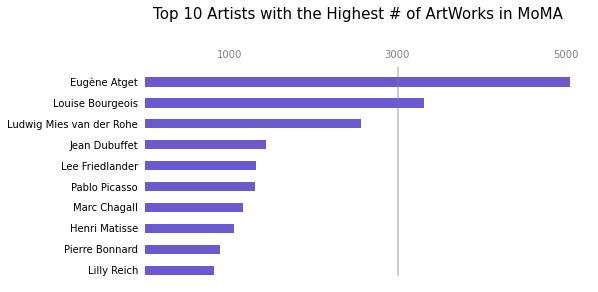

In [ ]:
# let's make the chart prettier using an object-oriented (OO) interface
fig, ax = plt.subplots(figsize=(8, 4)) #figsize changes the size
ax.barh(top10_artist['artists'],
         top10_artist['counts'],
       height=0.45, color='slateblue')

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False) # removes all four chart box lines

ax.tick_params(bottom=False, left=False) # removes the tick marks next to the artists names
ax.set_xticks([1000, 3000, 5000]) # set only certain x count markers
ax.xaxis.tick_top() # move ticks from bottom to top
ax.tick_params(top=False, left=False) # remove ticks from x axis
ax.tick_params(axis='x', colors='grey') #lightens the color of the x axis text

ax.text(x=100, y=-3, s='Top 10 Artists with the Highest # of ArtWorks in MoMA',
        size=15)
ax.axvline(x=3000, ymin=0.045, c='grey', alpha=0.5) # sets a grey marker line in the chart
ax.invert_yaxis() # flip the axis to sort descending

  
plt.show()

In [ ]:
# nationality with the greatest frequency of artwork

top_nations = whole['nationality'].value_counts().rename_axis('nationality').reset_index(name='counts')
top_nations = top_nations[0:10]
top_nations

,nationality,counts
0,American,55300
1,French,22394
2,German,9142
3,British,5672
4,Spanish,2983
5,Italian,2874
6,Japanese,2423
7,Swiss,1997
8,Dutch,1536
9,Russian,1495


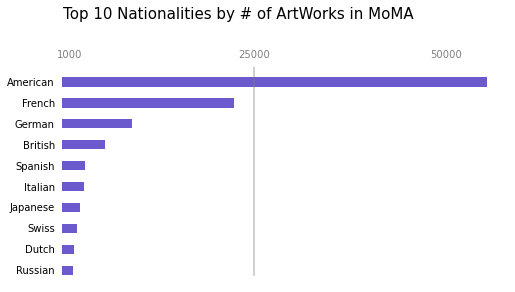

In [ ]:
# let's make the chart prettier using an object-oriented (OO) interface
fig, ax = plt.subplots(figsize=(8, 4)) #figsize changes the size
ax.barh(top_nations['nationality'],
         top_nations['counts'],
       height=0.45, color='slateblue')

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False) # removes all four chart box lines

ax.tick_params(bottom=False, left=False) # removes the tick marks next to the artists names
ax.set_xticks([1000, 25000, 50000]) # set only certain x count markers
ax.xaxis.tick_top() # move ticks from bottom to top
ax.tick_params(top=False, left=False) # remove ticks from x axis
ax.tick_params(axis='x', colors='grey') #lightens the color of the x axis text

ax.text(x=100, y=-3, s='Top 10 Nationalities by # of ArtWorks in MoMA',
        size=15)
ax.axvline(x=25000, ymin=0.045, c='grey', alpha=0.5) # sets a grey marker line in the chart
ax.invert_yaxis() # flip the axis to sort descending

  
plt.show()

In [ ]:
# frequency of artwork by classification type

top_classify = whole['classification'].value_counts().rename_axis('classifications').reset_index(name='counts')
top_classify = top_classify[0:10]
top_classify

,classifications,counts
0,Print,30807
1,Photograph,29909
2,Illustrated Book,26160
3,Drawing,11735
4,Design,11223
5,Mies van der Rohe Archive,3331
6,Architecture,2947
7,Video,2363
8,Film,2292
9,Painting,2270


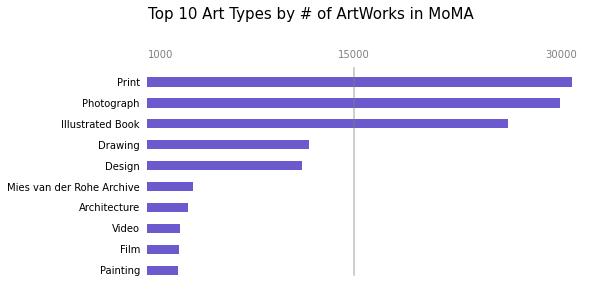

In [ ]:
# let's make the chart prettier using an object-oriented (OO) interface
fig, ax = plt.subplots(figsize=(8, 4)) #figsize changes the size
ax.barh(top_classify['classifications'],
         top_classify['counts'],
       height=0.45, color='slateblue')

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False) # removes all four chart box lines

ax.tick_params(bottom=False, left=False) # removes the tick marks next to the artists names
ax.set_xticks([1000, 15000, 30000]) # set only certain x count markers
ax.xaxis.tick_top() # move ticks from bottom to top
ax.tick_params(top=False, left=False) # remove ticks from x axis
ax.tick_params(axis='x', colors='grey') #lightens the color of the x axis text

ax.text(x=100, y=-3, s='Top 10 Art Types by # of ArtWorks in MoMA',
        size=15)
ax.axvline(x=15000, ymin=0.045, c='grey', alpha=0.5) # sets a grey marker line in the chart
ax.invert_yaxis() # flip the axis to sort descending

  
plt.show()

In [ ]:
# number artists by gender

male_artists = whole[(whole['gender']=='Male')]
male_artists.head()
males = male_artists.name_x.unique()
males2 = len(males)  

female_artists = whole[(whole['gender']=='Female')]
female_artists.head()
females = female_artists.name_x.unique()
females2 = len(females)


other_artists = whole[(whole['gender']=='Gender Unknown')]
other_artists.head()
others = other_artists.name_x.unique()
others2 = len(others)

all_gen= males2 + females2 + others2 - 1 # we need to subtract one for the unknown artist counts


# temp2 = "There are {m:,} artworks by male artists, {f:,} by females and {o:,} by other genders in the Museum of Modern Art. In total there are {a:,} unique known artists featured."
# output = temp2.format(m=males2, f=females2, o=others2, a=all_gen)
# print(output)

gender_data = [['males', males2], ['females',females2],['others', others2]] # build a list with the gender data
gender_df = pd.DataFrame(gender_data, columns = ['gender', 'counts']) # transform that list into a dataframe
gender_df

,gender,counts
0,males,8336
1,females,1829
2,others,1094


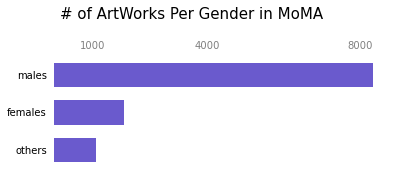

In [ ]:
# let's make the chart prettier using an object-oriented (OO) interface
fig, ax = plt.subplots(figsize=(6, 2)) #figsize changes the size
ax.barh(gender_df['gender'],
         gender_df['counts'],
       height=0.65, color='slateblue')

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False) # removes all four chart box lines

ax.tick_params(bottom=False, left=False) # removes the tick marks next to the artists names
ax.set_xticks([1000, 4000, 8000]) # set only certain x count markers
ax.xaxis.tick_top() # move ticks from bottom to top
ax.tick_params(top=False, left=False) # remove ticks from x axis
ax.tick_params(axis='x', colors='grey') #lightens the color of the x axis text

ax.text(x=150, y=-1.5, s='# of ArtWorks Per Gender in MoMA',
        size=15)
ax.invert_yaxis() # flip the axis to sort descending

  
plt.show()

In [ ]:
# largest artwork by weight

heav = whole.weight_kg.unique() 
# print(heav[:50])

# looking at the unique values showed that we needed to set 0 for blank values
whole['weight_kg'] = whole['weight_kg'].replace([''],'0') 
whole['weight_kg'] = pd.to_numeric(whole['weight_kg'], downcast='float')

# after changing the values to integers we can set a descending sort value and see the heaviest artwork in MoMA                                   
heavy_art = whole.sort_values(by=['weight_kg'], ascending = False)
heavy_art.head()

heaviest_artwork = heavy_art.iloc[0]
# print(heaviest_artwork)

heavy_title = heaviest_artwork['title']
heavy_artist = heaviest_artwork['name_x']
heavy_date = heaviest_artwork['date']
heavy_classification = heaviest_artwork['classification']
heavy_weight = heaviest_artwork['weight_kg']

temp3 = "The heaviest artwork in MoMA is the {t} {c} created by {a} in {d}. It has a weight of {w:,.1f} kg"
output3 = temp3.format(t=heavy_title, c=heavy_classification, a=heavy_artist, d=heavy_date, w=heavy_weight)
print(output3)

The heaviest artwork in MoMA is the Switch Sculpture created by Richard Serra in 1999. It has a weight of 185,067.6 kg


### Average Age of Artist When ArtWork was Acquired

In [1]:
# first let's make a dataframe with just the relevant columns

age_df = select.loc[:,['artwork_id', 'artist_id', 'name_x', 'classification' ,'date', 'acquisition_date', 'gender', 'birth_year', 'death_year']]
age_df.head()

NameError: ignored

In [ ]:
age_df['acquisition_date'].unique() # confirms all entries have a yyyy on the left
age_df['acquisition_year'] = age_df['acquisition_date'].str[:4] # extracts the year and places into a new column
age_df.head(5)

In [ ]:
age_df['acquisition_year'].unique()

In [ ]:
# we need to change years to numbers so we can calculate ages
# we have to handle nans first
age_df['birth_year'] = age_df['birth_year'].replace([''],'0').fillna(0).astype(str).astype(int)
age_df['death_year'] = age_df['death_year'].replace([''],'0').fillna(0).astype(str).astype(int)
age_df['acquisition_year'] = age_df['acquisition_year'].fillna(0)
age_df['acquisition_year'] = age_df['acquisition_year'].astype(str).astype(int)
age_df = age_df[age_df['acquisition_year'] != 0] #removes all rows where the acquisition date is unknown
age_df = age_df[age_df['birth_year'] != 0] #removes all rows where the birth year is unknown

In [ ]:
age_df['acquisition_year'].unique()
# age_df.info() # we now have data we can work with to calculate age
# age_df.head(10)

In [ ]:
# but before we can accurately calculate average age at acquisition 
# we need to isolate only artists who were living when their work was acquired
alive = age_df[age_df['death_year'] == 0]
alive['age_at_acq'] = alive['acquisition_year'] - alive['birth_year']
alive['age_at_acq'].unique()
# alive.tail()

In [ ]:
# let's look at a few of the unusual results
odd = alive[alive['age_at_acq'] > 100]
odd.head()

# this shows us that there may be some death years missing
# let's throw out any cases larger than 100

In [ ]:
alive = alive[alive['age_at_acq'] < 101]
alive.head()

In [ ]:
alive['age_at_acq'].unique()
# we also need to remove the negative values
alive = alive[alive['age_at_acq'] > 0]
alive['age_at_acq'].unique()

In [ ]:
# find the average age at acquisition for all live artists
avg_age_acq = round(alive['age_at_acq'].mean(),1)
template = "There are {q:,} artworks from known living artists with available birth years and acquisition years. The average age of the artist at acquisition year is {y:,} year's old."
output = template.format(y=avg_age_acq, q=len(alive['age_at_acq']))
print(output)

In [ ]:
# does the average age change by the type of art
alive['classification'].unique()
age_class = alive.groupby('classification')['age_at_acq'].mean().round(1).reset_index()
age_class = age_class.sort_values(by='age_at_acq', ascending=False)
age_class.head()

In [ ]:
# visualization of average age by classification type
fig, ax = plt.subplots(figsize=(10, 6)) #figsize changes the size
ax.barh(age_class['classification'],
        age_class['age_at_acq'],
       height=.5, color='slateblue')

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False) # removes all four chart box lines

ax.tick_params(bottom=False, left=False) # removes the tick marks next to the artists names
ax.set_xticks([10, 40, 80]) # set only certain x count markers
ax.xaxis.tick_top() # move ticks from bottom to top
ax.tick_params(top=False, left=False) # remove ticks from x axis
ax.tick_params(axis='x', colors='grey') #lightens the color of the x axis text

ax.text(x=8, y=-4, s='Average Age of Artist at Time Artwork was Acquired',
        size=15)
ax.axvline(x=40, ymin=0.045, c='grey', alpha=0.5) # sets a grey marker line in the chart
ax.invert_yaxis() # flip the axis to sort descending  
plt.show()

In [ ]:
# youngest artist to be featured in MoMa
youngest = alive.sort_values(by='age_at_acq',ascending=True)
youngest.head()
youngest = youngest[(youngest['age_at_acq']==1)]
youngest.head(10)

In [ ]:
# there are 6 records where the age at time of acquisition was one year
# however, for many of the records the art's creation date preceeds the birth year
# this creates concerns for the validity of the birth year
# for 1 out of the 6 records the birth year, art creation date and acquisition all align
# this record will be classified as the youngest artist to be featured

youngest_artist = youngest[(youngest['name_x']=='Robin Schwartz')].reset_index()
name=youngest_artist['name_x']
year=youngest_artist['acquisition_year']

template = "The youngest artist featured in the Museum of Modern Art was {q:}. She was a one year old Female whose print art was acquired in {y}."
output = template.format(q=name, y=year)
print(output)
# name.head()

In [ ]:
# number of pieces acquired by year

yearly = age_df['acquisition_year'].value_counts().rename_axis('acquisition_year').reset_index(name='counts')
yearly = yearly.sort_values(by='counts', ascending=False)
yearly.head(10)

# here we can see that the most pieces of artwork were collected in 1964
# we can also see that we have a faulty record (year 1216) That predates the open date of the museum
# we can throw that record out
yearly = yearly[(yearly['acquisition_year']!= 1216)]
yearly.head()

# len(yearly)
# with 89 different years of artwork collection we can not easily see trends over time

In [ ]:
# let's bucket the years so we can better understand trends over time

bins = [1925, 1935, 1945, 1955, 1965, 1975, 1985, 1995, 2005, 2015, 2025]
labels =['25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94', '95-04', '05-14', '15-24']
yearly = yearly.sort_values(by='acquisition_year', ascending=True)
yearly['binned'] = pd.cut(yearly['acquisition_year'], bins,labels=labels)

yearly.head()

yearly_binned = yearly.groupby('binned')['counts'].sum().rename_axis('year_groups').reset_index(name='# of artworks')
yearly_binned.head(25)

In [ ]:
# checking to make sure the binning bucketed properly
yearly['counts'].sum()
yearly_binned['# of artworks'].sum()

In [ ]:
# visualization of artworks collected over ten year increments
fig, ax = plt.subplots(figsize=(10, 4)) #figsize changes the size
ax.barh(yearly_binned['year_groups'],
        yearly_binned['# of artworks'],
       height=.5, color='slateblue')

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False) # removes all four chart box lines

ax.tick_params(bottom=False, left=False) # removes the tick marks next to the artists names
ax.set_xticks([500, 4000, 8000, 12000, 16000, 20000]) # set only certain x count markers
ax.xaxis.tick_top() # move ticks from bottom to top
ax.tick_params(top=False, left=False) # remove ticks from x axis
ax.tick_params(axis='x', colors='grey') #lightens the color of the x axis text

ax.text(x=2, y=-2.5, s='# of ArtWorks Collected by 10 Year Increment',
        size=15)
ax.axvline(x=12000, ymin=0.045, c='grey', alpha=0.5) # sets a grey marker line in the chart
ax.invert_yaxis() # flip the axis to sort descending  
plt.show()

In [ ]:
# Did the MoMa become more diverse over time, or was the # of artworks per artist consistent over time?

# pull the number of artworks per year
art_count_years = age_df['acquisition_year'].value_counts().rename_axis('acquisition_year').reset_index(name='art counts')
art_count_years.head(5)

# pull the number of unique artists per year
artist_count_years = age_df.groupby('acquisition_year')['artist_id'].nunique().reset_index()
artist_count_years.head(5)

# merge the dataframes
year_merge = pd.merge(art_count_years, artist_count_years, on='acquisition_year', how='outer')
year_merge.head()

In [ ]:
# create bins to merge years into 10 year intervals
bins = [1925, 1935, 1945, 1955, 1965, 1975, 1985, 1995, 2005, 2015, 2025]
labels =['25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85-94', '95-04', '05-14', '15-24']
art_group = year_merge.sort_values(by='acquisition_year', ascending=True)
art_group['binned'] = pd.cut(year_merge['acquisition_year'], bins,labels=labels)
art_group = art_group[(art_group['acquisition_year']!= 1216)]

art_group.head(20)

In [ ]:
binned_art_1 = art_group.groupby('binned')['art counts'].sum().reset_index()
binned_art_1.head(10)

binned_art_2 = art_group.groupby('binned')['artist_id'].sum().reset_index()
binned_art_2.head(10)

binned_art_per = pd.merge(binned_art_1, binned_art_2, on='binned', how='outer')
binned_art_per.head(10)

binned_art_per['avg artworks per artist'] = (binned_art_per['art counts'] / binned_art_per['artist_id']).round(decimals=1)
binned_art_per.head(10)

In [ ]:
# visualization of average artworks per artist over time
fig, ax = plt.subplots(figsize=(10, 6)) #figsize changes the size
ax.barh(binned_art_per['binned'],
        binned_art_per['avg artworks per artist'],
       height=.5, color='slateblue')

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False) # removes all four chart box lines

ax.tick_params(bottom=False, left=False) # removes the tick marks next to the artists names
ax.set_xticks([0, 2, 4, 6, 8, 10]) # set only certain x count markers
ax.xaxis.tick_top() # move ticks from bottom to top
ax.tick_params(top=False, left=False) # remove ticks from x axis
ax.tick_params(axis='x', colors='grey') #lightens the color of the x axis text

ax.text(x=3, y=-2, s='Average # of ArtWorks Per Artist Over Time',
        size=15)
ax.axvline(x=6, ymin=0.045, c='grey', alpha=0.5) # sets a grey marker line in the chart
ax.invert_yaxis() # flip the axis to sort descending  
plt.show()

In [ ]:
# the next things I want to learn
# how to plot two very different bars (ex: # of artworks vs avg artwork per artist)